In [471]:
import pandas as pd
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import re
plt.style.use('ggplot')

In [3]:
cars = pd.read_csv("cars.csv")

In [4]:
cars["drive"] = cars["drive"].str.strip()
cars["title"] = cars["title"].str.strip()
cars["exter"] = cars["exter"].str.strip()
cars["inter"] = cars["inter"].str.strip()
cars["made"] = cars["made"].str.strip()
cars["model"] = cars["model"].str.strip()
cars["eng"] = cars["eng"].str.strip()
cars["tran"] = cars["tran"].str.strip()
cars["mileage"] = cars["mileage"].str.strip()

In [21]:
len(cars)

56857

In [85]:
cars.head()

,cty,drive,eng,exter,fuel,hwy,inter,made,mileage,model,price,slreview,slrzip,title,tran,year
0,27.0,FWD,Gas I4 1.8L/110,Silver,Gasoline,35.0,NaN,Toyota,80135,Corolla,6990,2.1,7834.0,Used 2009 Toyota Corolla LE,Automatic,2009
1,24.0,FWD,Gas I4 2.4L/146,Red,Gasoline,33.0,NaN,Toyota,157470,Camry,4390,2.1,7834.0,Used 2006 Toyota Camry LE,5-Speed Automatic w/OD,2006
2,23.0,AWD,2.5L 4-Cylinder DOHC Dual VVT-i,Silver,Gasoline,30.0,Ash,Toyota,12001,RAV4,28997,4.6,6807.0,Used 2018 Toyota RAV4 XLE,6-Speed Automatic,2018
3,17.0,AWD,4.0L V6 SMPI DOHC,Silver,Gasoline,21.0,Bl Gr Sft Syn Lth,Toyota,5,4Runner,37639,4.6,6807.0,Used 2018 Toyota 4Runner SR5 Premium,5-Speed Automatic with Overdrive,2018
4,13.0,AWD,5.7L V8 DOHC Dual VVT-i 32V,Black,Gasoline,18.0,Terra Semi-Aniline Perfor,Toyota,201,Land,80997,4.6,6807.0,Used 2019 Toyota Land Cruiser Base,8-Speed Automatic (ECT-i),2019


In [5]:
cars["price"].replace(["Not Priced","FWD"], None, inplace = True)
cars["price"].replace({'\$': '', ',': ''}, regex=True, inplace = True)
cars["mileage"].replace({',': ''}, regex=True, inplace = True)

In [17]:
cars["mileage"].replace("Not provided", None, inplace = True)
cars["price"].replace(["NaN", 1], None, inplace = True)

In [22]:
cars["mileage"] = cars["mileage"].astype(int)
cars["price"] = cars["price"].astype(int)

In [23]:
cars["exter"].fillna("UNKNOW", inplace = True)
cars["price"].dropna(how = "any", inplace = True)
cars["mileage"].dropna(inplace = True)
cars = cars.loc[-cars["price"].isna()]
cars.isna().sum()

cty         8342
drive       3426
eng         1748
exter          0
fuel           0
hwy         8342
inter       5656
made           0
mileage        0
model          0
price          0
slreview    4622
slrzip      1173
title          0
tran        1003
year           0
dtype: int64

In [16]:
cars.dtypes

cty         float64
drive        object
eng          object
exter        object
fuel         object
hwy         float64
inter        object
made         object
mileage       int64
model        object
price        object
slreview    float64
slrzip      float64
title        object
tran         object
year          int64
dtype: object

In [10]:
cars["drive"].replace(["4MATIC", "quattro", "Quattro AWD", "Four Wheel Drive", "All Wheel Drive", 
                        "All-Wheel Drive with Locking Differential", "All-Wheel Drive with Locking and Limited-Slip Differential", 
                        "ALL-WHEEL DRIVE", "4x4/4-wheel drive", "Four-Wheel Drive with Locking and Limited-Slip Differential", 
                        "4x4", "4WD", "4MATICA?", "4MATIC AWD", "4MATIC 4WD", "FOUR-WHEEL DRIVE", "Four-Wheel",
                        "4x2","4X2", "4X4", "CVT 7-Speed", "All-wheel Drive"], "AWD", inplace = True)

In [11]:
cars["drive"].replace(["Front-wheel Drive", "FrontTrak", "FRONT-WHEEL DRIVE", "Front Wheel Drive", "2WD", "Unspecified",
                        "Front-Wheel Drive with Limited-Slip Differential", "Front-Wheel Drive"], "FWD", inplace = True)

In [12]:
cars["drive"].replace(["Rear-wheel Drive", "Rear-Wheel Drive with Limited-Slip Differential", "4x2/2-wheel drive", 
                        "Rear-Wheel Drive", "Rear Wheel Drive", "Automatic 8-Speed"], "RWD", inplace = True)
cars.groupby("drive")["title"].count().sort_values(ascending = False)

drive
AWD    30751
FWD    17875
RWD     4807
Name: title, dtype: int64

In [13]:
cars.loc[cars["exter"].str.contains("White"), "exter"] = "White"
cars.loc[cars["exter"].str.contains("Black"), "exter"] = "Black"
cars.loc[cars["exter"].str.contains("Silver"), "exter"] = "Silver"
cars.loc[cars["exter"].str.contains("Blue"), "exter"] = "Blue"
cars.loc[cars["exter"].str.contains("Red"), "exter"] = "Red"
cars.loc[cars["exter"].str.contains("Gray"), "exter"] = "Gray"
cars.loc[cars["exter"].str.contains("Yellow"), "exter"] = "Yellow"
cars.loc[cars["exter"].str.contains("Brown"), "exter"] = "Brown"
cars.loc[cars["exter"].str.contains("Grey"), "exter"] = "Gray"

In [131]:
scatter_df = cars.loc[(cars["year"]>2000) & (cars["made"] == "Mercedes-Benz")]
scatter_df = scatter_df[["year", "price"]]

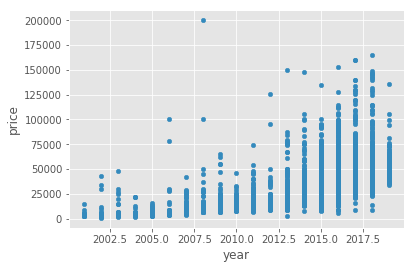

In [132]:
scatter_df.plot.scatter(x = "year", y = "price")

In [123]:
scatter_df1 = cars.loc[(cars["mileage"]<200000) & (cars["price"]<300000) & (cars["made"] == "Chevrolet")]
scatter_df1 = scatter_df1[["price", "mileage"]]

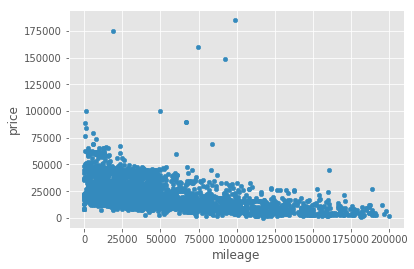

In [124]:
scatter_df1.plot.scatter(x = "mileage", y = "price")

In [96]:
cars.groupby("made")["title"].count().sort_values(ascending = False)

made
Nissan           4931
Honda            4890
BMW              4886
Ford             4767
Toyota           4728
Mercedes-Benz    4557
Chevrolet        3659
Jeep             3256
Hyundai          1881
Lexus            1844
Audi             1691
Volkswagen       1684
Dodge            1535
Subaru           1432
Acura            1374
INFINITI         1361
Kia              1122
GMC               942
Cadillac          889
Mazda             846
Porsche           622
Land              610
Volvo             573
Chrysler          554
RAM               544
Lincoln           513
Buick             408
Mitsubishi        231
MINI              219
Maserati          139
Jaguar            106
Scion              42
Ferrari            19
Bentley             1
Name: title, dtype: int64

In [137]:
t10cars = cars.loc[cars["made"].isin(["Nissan","Honda", "BMW", "Ford", "Toyota", "Mercedes-Benz", "Chevrolet", "Jeep",
                           "Hyundai", "Lexus"]) & (cars["year"] > 2000)]

In [140]:
t10cars.shape

(39145, 16)

In [138]:
t10cars.groupby("made")[["price"]].mean().sort_values(by="price", ascending = False)

,price
made,
Mercedes-Benz,34785.749116
BMW,29423.557996
Lexus,27323.713039
Jeep,21892.563580
Chevrolet,20964.959677
Ford,20082.759161
Toyota,19308.723858
Honda,17029.800287
Nissan,15587.341597


In [139]:
t10cars.groupby("made")[["mileage"]].mean().sort_values(by="mileage", ascending = False)

,mileage
made,
Ford,54447.244228
Honda,50199.489737
Toyota,48629.179898
Jeep,48068.624383
Chevrolet,47085.892937
Hyundai,46106.657097
Nissan,46067.778297
Lexus,45712.770322
BMW,44764.901868


In [134]:
cars.loc[cars["year"]<2000].shape

(307, 16)

In [687]:
t10 = t10cars[t10cars.groupby("year").price.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
t10 = t10[t10.groupby("year").mileage.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]

In [688]:
t10.shape

(38137, 16)

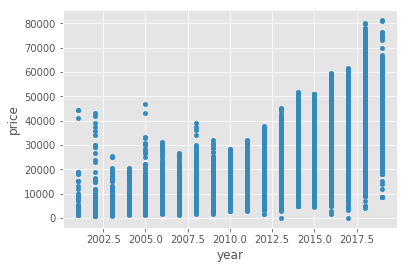

In [689]:
t10.plot.scatter(x = "year", y = "price")

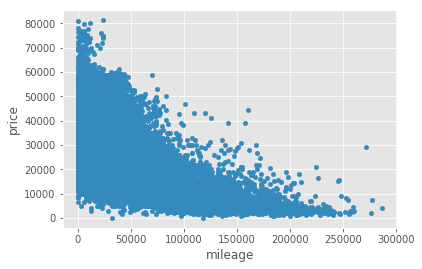

In [690]:
t10.plot.scatter(x = "mileage", y = "price")

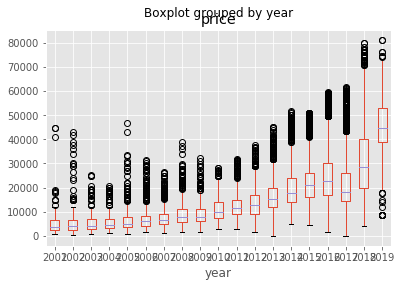

In [691]:
t10.boxplot(by = 'year', column = 'price')

In [537]:
myear = t10['year'] == 2006
mprice = t10['price'] > 10000
mmade = t10['made'] == "Honda"
t10.loc[myear & mprice & mmade]

,cty,drive,eng,exter,fuel,hwy,inter,made,mileage,model,price,slreview,slrzip,title,tran,year
162,26.0,FWD,2.4L I4 16V MPFI DOHC,UNKNOW,Gasoline,34.0,NaN,Honda,139022,Accord,22995,3.3,6830.0,Used 2006 Honda Accord LX,5-Speed Automatic,2006
164,19.0,FWD,Gas V6 3.5L/212,UNKNOW,Gasoline,25.0,NaN,Honda,41278,Odyssey,25895,4.7,8857.0,Used 2006 Honda Odyssey EX,Automatic,2006
240,26.0,FWD,4 Cylinder,Black,Gasoline,34.0,NaN,Honda,124405,Accord,31300,4.7,7730.0,Used 2006 Honda Accord SE,Manual,2006
962,19.0,FWD,3.5L V6 Cylinder Engine,Gray,Gasoline,25.0,NaN,Honda,129970,Odyssey,15995,5.0,8840.0,Used 2006 Honda Odyssey EX,NaN,2006
1006,30.0,FWD,I-4 cyl,Gray,Gasoline,38.0,NaN,Honda,47455,Civic,24595,4.6,11542.0,Used 2006 Honda Civic LX,Automatic,2006
16946,NaN,AWD,3.5L V6 CYLINDER,Gray,Gasoline,NaN,Gray,Honda,83163,Ridgeline,13575,3.8,8882.0,Used 2006 Honda Ridgeline RTL with MOONROOF,5-Speed Automatic,2006
17747,19.0,FWD,3.5L V6 24V MPFI SOHC,Gray,Gasoline,25.0,NaN,Honda,203690,Odyssey,14500,3.1,11101.0,Used 2006 Honda Odyssey EX,5-Speed Automatic,2006
17883,17.0,AWD,Gas V6 3.5L/212,UNKNOW,Gasoline,22.0,NaN,Honda,153978,Pilot,20995,4.9,7631.0,Used 2006 Honda Pilot EX-L,5-Speed Automatic w/OD,2006


In [692]:
t10.groupby("made")["title"].count().sort_values(ascending = False)

made
Nissan           4867
Honda            4833
BMW              4768
Toyota           4636
Ford             4588
Mercedes-Benz    4070
Chevrolet        3494
Jeep             3214
Hyundai          1864
Lexus            1803
Name: title, dtype: int64

In [693]:
t10.loc[t10["made"] == "Honda"].groupby("model")["title"].count().sort_values(ascending = False)

model
Accord       1501
CR-V         1038
Civic        1010
Pilot         532
Odyssey       477
HR-V          115
Fit            84
Ridgeline      33
Crosstour      12
Element        11
Insight         6
CR-Z            5
S2000           4
Clarity         3
EX              2
Name: title, dtype: int64

In [697]:
t10 = t10.assign(age = 2019 - t10["year"])

In [698]:
honda = t10.loc[t10["made"] == "Honda"][["age", "mileage", "price", "model"]]
honda.shape

(4833, 4)

In [699]:
honda = honda[honda.groupby("age").price.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
honda = honda[honda.groupby("age").mileage.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
honda.shape

(4738, 4)

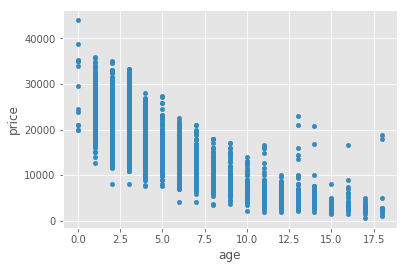

In [700]:
honda.plot.scatter(x = "age", y = "price")

In [701]:
honda = pd.get_dummies(honda)

In [702]:
X.head()

,age,mileage,model_Accord,model_CR-V,model_CR-Z,model_Civic,model_Clarity,model_Crosstour,model_EX,model_Element,model_Fit,model_HR-V,model_Insight,model_Odyssey,model_Pilot,model_Ridgeline,model_S2000,agesqrt
143,3,15053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
144,3,26684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
145,3,44096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
146,2,18688,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
147,1,21353,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [703]:
X = honda.drop("price", axis = 1)

In [704]:
X =  X.assign(agesqrt = X.age**2)

In [705]:
y = honda["price"]

In [706]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [722]:
X_train.head()

,age,mileage,model_Accord,model_CR-V,model_CR-Z,model_Civic,model_Clarity,model_Crosstour,model_EX,model_Element,model_Fit,model_HR-V,model_Insight,model_Odyssey,model_Pilot,model_Ridgeline,model_S2000,agesqrt
16023,1,23246,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
16925,3,25927,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
16375,3,30564,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9
44585,3,15981,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
45190,4,40009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16


In [707]:
lm = linear_model.LinearRegression()

In [712]:
model = lm.fit(X_train,y_train)

In [714]:
model.score(X_test,y_test)

0.8320252599588952

In [715]:
y_pre = model.predict(X_train)

In [716]:
y_pre[0:5]

array([20989.31935405, 18408.20136071, 16795.46608206, 18904.42753602,
       16029.01282794])

In [717]:
y_train[0:5]

16023    15900
16925    19888
16375    14500
44585    18316
45190    15485
Name: price, dtype: int64

In [720]:
model.coef_

array([-2.23138872e+03, -4.98920345e-02, -2.47208344e+03,  1.62134100e+02,
       -4.80308145e+03, -3.85346936e+03, -8.13470405e+02,  1.56538148e+03,
        1.38737673e+03,  1.25296304e+02, -4.29062941e+03, -2.79743587e+03,
       -5.18733337e+03,  2.49079141e+03,  5.04008031e+03,  4.83011961e+03,
        8.61632338e+03,  7.92542597e+01])

In [723]:
model.coef_[0] + model.coef_[-1]

-2152.134460701011

In [721]:
model.intercept_

28154.713407019135

In [568]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pre))
RMSE

2739.71032984457